# 19  聊聊pandas

## 一.什么是Pandas？

1.Pandas最基本的数据结构是Series和DataFrame。 Series 是一种类似于一维数组的对象，相当于NumPy一维数组；而DataFrame是一种二维表
   格型的数据结构，可以容纳多种类型的数据，并且可以进行各种数据操作。DataFrame在本书中被叫做数据帧。
2.NumPy Array和Pandas DataFrame的区别：
    NumPy Array是多维数组对象，一般要求所有元素具有相同的数据类型，即同质性；
            而且只能使用整数索引；
    Pandas DataFrame是一个二维表格数据结构，类似于Excel表格，具有行标签和列标签，它由多个列组成，每列可以是不同的数据类型；
            支持自定义行标签和列标签，可以使用标签索引，也可以使用整数索引
3.Numpy Array和Pandas DataFrame的相互转化：
    Array--->DataFrame:pandas.DataFrame()
    DataFrame--->Array:pandas.DataFrame.to_numpy()

## 二.创建数据帧：从字典、列表、Numpy数组...

### 1.字典

In [1]:
import pandas as pd

dict_eg = {'name':['a', 'b', 'c', 'd', 'e'], 'height':[181, 182, 183, 184, 185]} #字典的键对应列标签，每个键对应的值是一个列表，这些列表将成为相应列中的数据
                                                                                 #确保字典中每个值的长度相同，以便正确创建数据帧
DataFrame_from_dict = pd.DataFrame(data = dict_eg)
DataFrame_from_dict_02 = DataFrame_from_dict.set_index('name')          #将数据帧的特定列设置为行标签
DataFrame_from_dict_03 = DataFrame_from_dict_02.reset_index(drop = False)
DataFrame_from_dict_04 = DataFrame_from_dict_02.reindex(['e','d','c','b','a'])

print(DataFrame_from_dict)
print(DataFrame_from_dict_02)
print(DataFrame_from_dict_03)
print(DataFrame_from_dict_04)

  name  height
0    a     181
1    b     182
2    c     183
3    d     184
4    e     185
      height
name        
a        181
b        182
c        183
d        184
e        185
  name  height
0    a     181
1    b     182
2    c     183
3    d     184
4    e     185
      height
name        
e        185
d        184
c        183
b        182
a        181


    此外，可以用pandas.DataFrame.reset_index() 重置行标签，将行标签设置为从0开始的整数索引，同时加一个原来的行标签转换成一个新的列。 
使用pandas.DataFrame.reset_index() 时，如果设置 drop=True，原来的行标签将会被删除。

### 2.列表

In [7]:
import pandas as pd

list_fruits = [['apple',  11],
               ['banana', 22],
               ['cherry', 33],
               ['durian', 44]]

df_list1 = pd.DataFrame(list_fruits)
df_list1.set_axis(['a','b','c','d'], axis = 'index')
df_list1.set_axis(['Fruit','number'],axis = 'columns')

df_list2 = pd.DataFrame(list_fruits,
                        index = ['a','b','c','d'],
                        columns = ['Fruits','number'])

print(df_list1)
print(df_list2)

        0   1
0   apple  11
1  banana  22
2  cherry  33
3  durian  44
   Fruits  number
a   apple      11
b  banana      22
c  cherry      33
d  durian      44


### 3.Numpy数组

In [10]:
import numpy as np
import pandas as pd

np_array = np.random.normal(size = (5,3))

df_np1 = pd.DataFrame(np_array,
                      columns = ['X1','X2','X3'])

data = []
for i in range(5):
    data_i = np.random.normal(size = (1,4)).tolist()
    data.append(data_i[0])

df_np2 = pd.DataFrame(data,
                      columns = ['X1','X2','X3','X4'])

print(df_np1)
print(df_np2)


         X1        X2        X3
0  0.378145 -0.699958  0.563408
1  0.788158  0.775709 -1.074737
2  1.434795  0.193912 -0.310316
3  0.304695  0.015794 -0.578892
4 -1.198408  2.331934  0.359990
         X1        X2        X3        X4
0 -0.917337 -0.408927 -0.002307  1.377140
1 -0.351221 -1.653422  1.610501  0.439316
2  1.426316  1.046302  0.255455 -0.461974
3  0.219047 -1.236635  1.345063 -0.207088
4 -0.519097  0.602948 -0.975403  0.267166


## 三.数据帧操作：以鸢尾花数据集为例

### 1.导入鸢尾花数据集

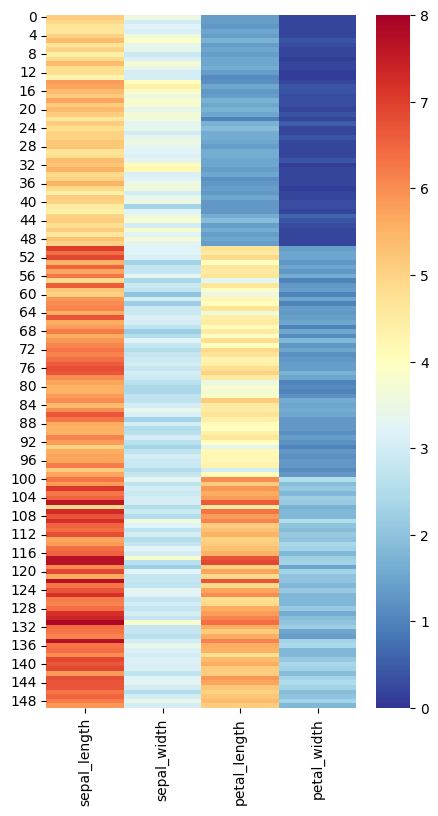

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris_df = sns.load_dataset("iris")
fig, ax = plt.subplots(figsize = (5, 9))
sns.heatmap(iris_df.iloc[:, 0:4],
            cmap = 'RdYlBu_r',
            ax = ax,
            vmax = 8, vmin = 0,
            cbar_kws = {'orientation':'vertical'},
            annot = False)

fig.savefig("鸢尾花数据集dataframe svg", format = "svg")



### 2.数据帧基本信息

pandas.DataFrame.index()：查询数据帧的行标签
pandas.DataFrame.columns()：查询数据帧的列标签
pandas.DataFrame.axs()：同时获得数据帧的行标签和列标签:
pandas.DataFrame.values()：用于返回数据帧中的实际数据作为一个多维Numpy数组
pandas.DataFrame.info()：用于返回数据帧的摘要信息(例如数据帧的结构、数据类型等)
pandas.DataFrame.describe()：用于生成关于数据帧统计的摘要信息(例如均值、标准差、最大最小值等)
pandas.DataFrame.nunique()：用于计算数据帧每一列中独特值的数量
pandas.DataFrame.head()：用于查看数据帧的前几行数据
pandas.DataFrame.tail()：用于查看数据帧的后几行数据
pandas.DataFrame.shape：用于获取数据帧的维度信息
pandas.DataFrame.size：用于返回数据帧中的元素总数，即行数乘以列数

### 3.循环

In [ ]:
import pandas as pd
import seaborn as sns

iris_df = sns.load_dataset("iris")

for idx, row_idx in iris_df.iterrows():
    print("===================")
    print("Row index = ", str(idx))
    print(row_idx['sepal_length'], row_idx['sepal_width'])

for column_idx in iris_df.items():
    print(column_idx)

### 4.修改数据帧

pandas.DataFrame.rename()：对DataFrame的索引标签、列标签或者组合标签进行重命名
pandas.DataFrame.add_suffix()：给DataFrame的列标签添加后缀，并返回一个新的DataFrame
pandas.DataFrame.add_prefix()：给DataFrame的列标签添加前缀，并返回一个新的DataFrame

### 5.更改列标签顺序

In [32]:
import pandas as pd
import seaborn as sns

iris_df = sns.load_dataset("iris")

new_color_order = ['species', 
                   'sepal_length', 'petal_length',
                   'sepal_width', 'petal_width']

df_1 = iris_df[new_color_order]
df_2 = iris_df.reindex(columns = new_color_order)
df_3 = iris_df.loc[:, new_color_order]
df_4 = iris_df.iloc[:, [4, 0, 2, 1, 3]]
df_5 = iris_df.set_axis(new_color_order, axis = 1)

print(df_4)

       species  sepal_length  petal_length  sepal_width  petal_width
0       setosa           5.1           1.4          3.5          0.2
1       setosa           4.9           1.4          3.0          0.2
2       setosa           4.7           1.3          3.2          0.2
3       setosa           4.6           1.5          3.1          0.2
4       setosa           5.0           1.4          3.6          0.2
..         ...           ...           ...          ...          ...
145  virginica           6.7           5.2          3.0          2.3
146  virginica           6.3           5.0          2.5          1.9
147  virginica           6.5           5.2          3.0          2.0
148  virginica           6.2           5.4          3.4          2.3
149  virginica           5.9           5.1          3.0          1.8

[150 rows x 5 columns]


### 6更改行标签顺序

In [41]:
import pandas as pd
import seaborn as sns

iris_df = sns.load_dataset("iris")

iris_df_ = iris_df.iloc[:5,:].rename(lambda x:f'idx_{x}')

new_order = ['idx_4', 'idx_3', 'idx_2', 'idx_1', 'idx_0']
df_1 = iris_df_.reindex(new_order)
df_2 = iris_df_.loc[new_order]

new_order__int = [4, 3, 2, 1, 0]
df_3 = iris_df_.iloc[new_order__int]
df_4 = iris_df_.sort_index(ascending=False)

print(iris_df_)
print(df_4)

       sepal_length  sepal_width  petal_length  petal_width species
idx_0           5.1          3.5           1.4          0.2  setosa
idx_1           4.9          3.0           1.4          0.2  setosa
idx_2           4.7          3.2           1.3          0.2  setosa
idx_3           4.6          3.1           1.5          0.2  setosa
idx_4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width species
idx_4           5.0          3.6           1.4          0.2  setosa
idx_3           4.6          3.1           1.5          0.2  setosa
idx_2           4.7          3.2           1.3          0.2  setosa
idx_1           4.9          3.0           1.4          0.2  setosa
idx_0           5.1          3.5           1.4          0.2  setosa


### 7.删除

In [45]:
import pandas as pd
import seaborn as sns

iris_df = sns.load_dataset("iris")

df_1 = iris_df.drop(index = [0,1])
df_2 = iris_df.drop(columns = 'species')

print(df_1)
print(df_2)

     sepal_length  sepal_width  petal_length  petal_width    species
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[148 rows x 5 columns]
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0  

## 四.四则运算：各列之间

C:\Users\zp\AppData\Local\Temp\ipykernel_10744\3640041385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df_['X1 - E(X1)'] = X_df_['X1'] - X_df_['X1'].mean()


       species  X1 - E(X1)  X2 - E(X2)  X1 + X2  X1 * X2
0       setosa   -0.743333    0.442667      8.6    17.85
1       setosa   -0.943333   -0.057333      7.9    14.70
2       setosa   -1.143333    0.142667      7.9    15.04
3       setosa   -1.243333    0.042667      7.7    14.26
4       setosa   -0.843333    0.542667      8.6    18.00
..         ...         ...         ...      ...      ...
145  virginica    0.856667   -0.057333      9.7    20.10
146  virginica    0.456667   -0.557333      8.8    15.75
147  virginica    0.656667   -0.057333      9.5    19.50
148  virginica    0.356667    0.342667      9.6    21.08
149  virginica    0.056667   -0.057333      8.9    17.70

[150 rows x 5 columns]


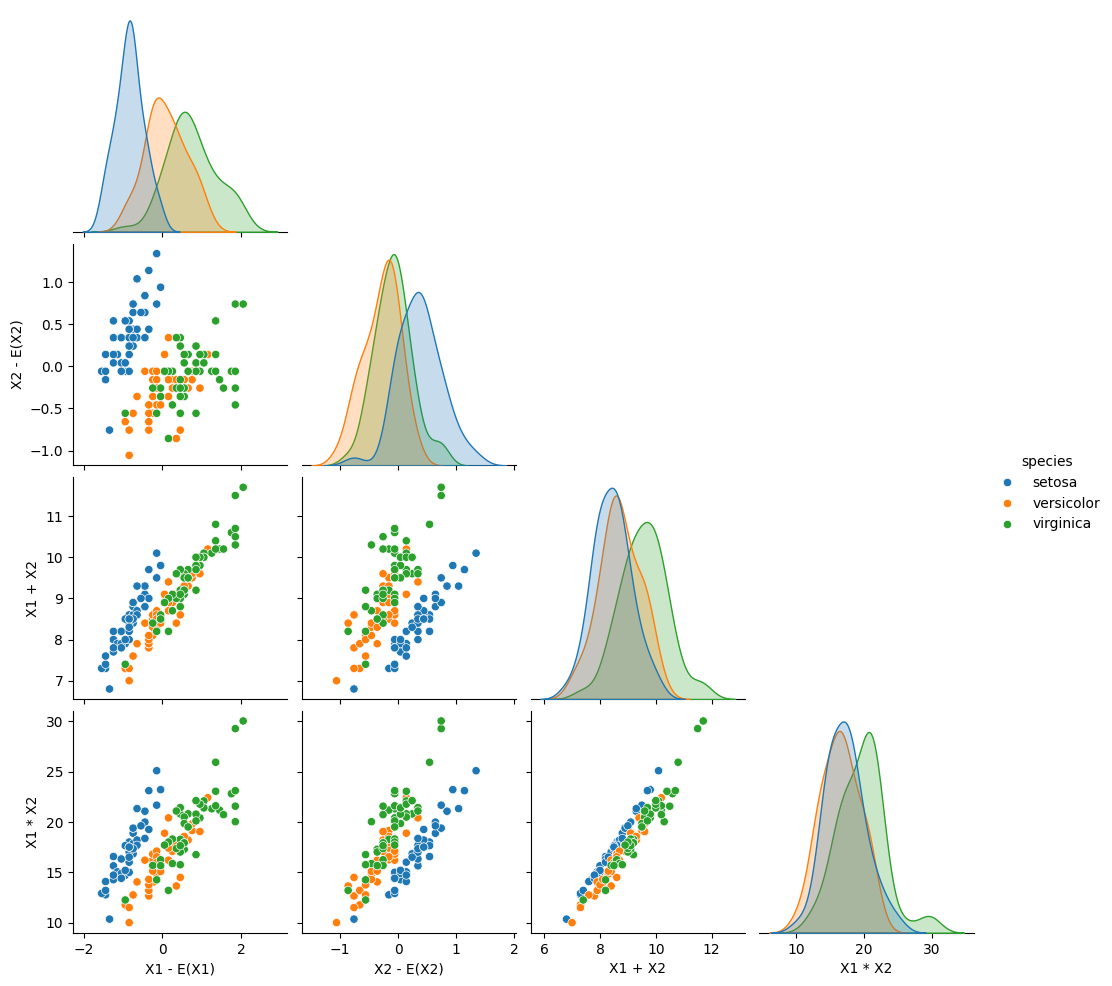

In [54]:
import pandas as pd
import seaborn as sns

iris_df = sns.load_dataset("iris")

X_df = iris_df.copy()
X_df.rename(columns={'sepal_length':'X1',
                        'sepal_width':'X2'},
                        inplace = True)
X_df_ = X_df[['X1','X2','species']]

X_df_['X1 - E(X1)'] = X_df_['X1'] - X_df_['X1'].mean()
X_df_['X2 - E(X2)'] = X_df_['X2'] - X_df_['X2'].mean()
X_df_['X1 + X2'] = X_df_['X1'] + X_df_['X2']
X_df_['X1 * X2'] = X_df_['X1'] * X_df_['X2']

X_df_.drop(['X1','X2'], axis = 1, inplace = True)

print(X_df_)

sns.pairplot(X_df_, corner = True, hue = 'species')

## 五.统计运算：聚合、降维、压缩、折叠 …

### 1.pandas中常用的统计运算方法

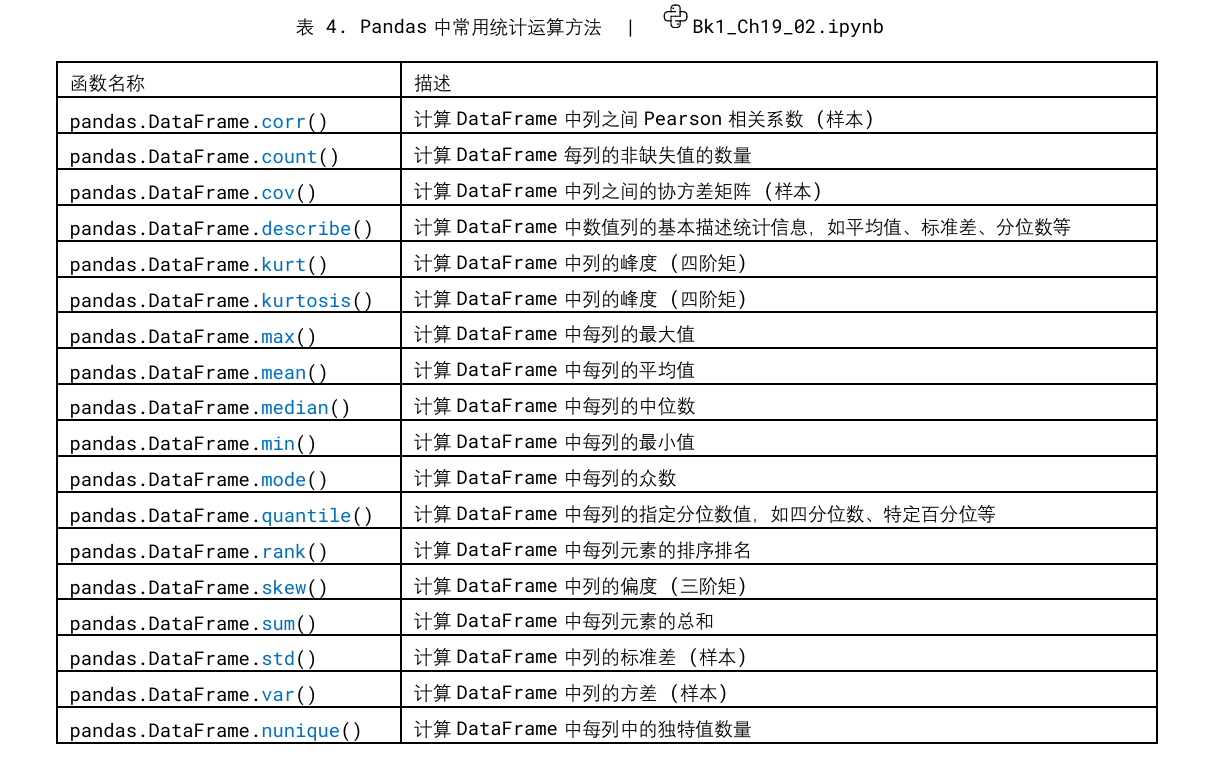

In [57]:
from IPython.display import Image

Image("C:/Users/zp/Pictures/QQ保存的图片/Pandas中常用的统计计算方法.png")

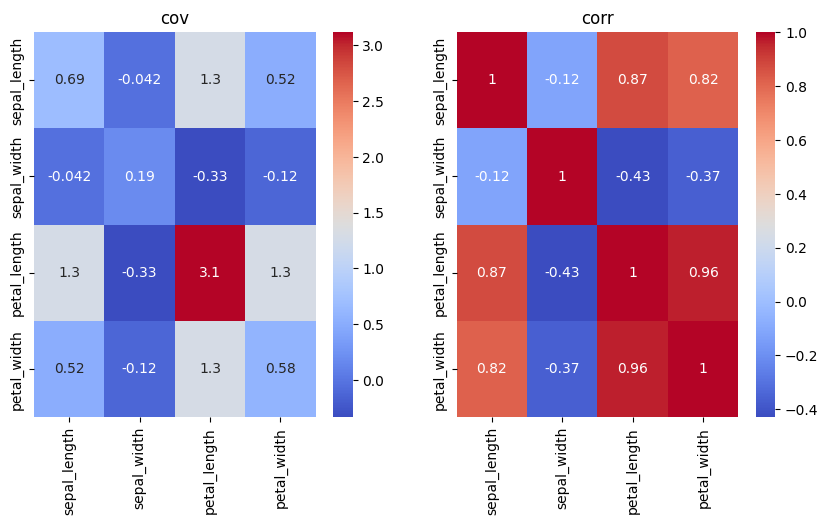

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris_df = sns.load_dataset("iris")

X_df = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

X_df_cov = pd.DataFrame.cov(X_df)
X_df_corr = pd.DataFrame.corr(X_df)

fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.heatmap(X_df_cov, ax = axs[0], annot = True, cmap = 'coolwarm')
axs[0].set_title("cov")
sns.heatmap(X_df_corr, ax = axs[1], annot = True, cmap = 'coolwarm')
axs[1].set_title("corr")
plt.show()

print(X_df_cov)
print(X_df_corr)